In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

84


In [3]:
# Create data storage

name = []
cloudiness = []
country = []
date = []
humid = []
lat = []
lng = []
max_temp = []
wind = []

# Get requests from Open Weather API

for city in cities:
    units="imperial"
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&units=" + units + "&appid=" + weather_api_key
    response = requests.get(url).json()
    
# If the city is found, store the weather data

    if response['cod'] == 200:
        name.append(response["name"])       
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])  
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        
# Include a print log of each city as it's being processed (with the city number and city name)

        print(response['id'],response['name'])

2110227 Butaritari
4020109 Atuona
103630 Najrān
1529569 Changji
4030556 Rikitea
3874787 Punta Arenas
1629380 Ruteng
1106643 Quatre Cocos
1282256 Hithadhoo
1015776 Bredasdorp
5122534 Jamestown
3833367 Ushuaia
3831208 Qaanaaq
3652764 Puerto Ayora
1626542 Sorong
6431379 Saint-Alexandre
1491977 Shumskiy
2163355 Hobart
2206939 Bluff
934479 Grand Gaube
1885823 Jiangyou
2219235 Ubari
2022572 Khatanga
5855927 Hilo
2017155 Saskylakh
2162683 Innisfail
1506268 Gornopravdinsk
2019135 Nizhniy Kuranakh
4671141 Aransas Pass
2094144 Kerema
964432 Port Alfred
4032243 Vaini
1691862 Rapu-Rapu
1539210 Purpe
2094342 Kavieng
5848280 Kapaa
5106841 Albany
3424607 Tasiilaq
364933 Umm Kaddadah
107304 Buraidah
3448903 São João da Barra
1808744 Hede
3932145 Pisco
935215 Saint-Philippe
4031574 Provideniya
3354071 Oranjemund
2159220 Mackay
2630299 Hofn
3418910 Upernavik
2136825 Isangel
1490256 Talnakh
3139597 Sistranda
756135 Warsaw
2037375 Fujin
1714733 Dingle
3430443 Necochea
1185239 Sarankhola
3369157 Cape Town


In [4]:
# Create a data frame from the weather data

weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

city_weather_df = pd.DataFrame(weather_dict)


In [5]:
# View data frame
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.20,69,87,11.27,KI,1597558285
1,Atuona,-9.80,-139.03,78.15,76,44,15.08,PF,1597558127
2,Najrān,17.49,44.13,93.20,18,20,4.70,SA,1597558286
3,Changji,44.02,87.32,84.20,32,0,8.95,CN,1597558286
4,Rikitea,-23.12,-134.97,71.04,80,0,15.41,PF,1597558124
...,...,...,...,...,...,...,...,...,...
73,Bethel,41.37,-73.41,66.99,82,90,8.05,US,1597558297
74,Texistepeque,14.13,-89.50,72.00,100,80,2.42,SV,1597558297
75,Fortuna,40.60,-124.16,63.00,76,0,2.21,US,1597558131
76,Joshīmath,30.57,79.57,78.19,49,13,6.85,IN,1597558297


In [6]:
#  Retrieve and view the indices of cities that have humidity over 100% (if any exist)

Names = city_weather_df[city_weather_df['Humidity'] > 100 ].index

print(Names)

# Delete these rows (if any exist) and create a clean data frame

clean_city_weather_df = city_weather_df.drop(Names,inplace=False)

Int64Index([], dtype='int64')


In [7]:
# View clean city weather data frame
clean_city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.20,69,87,11.27,KI,1597558285
1,Atuona,-9.80,-139.03,78.15,76,44,15.08,PF,1597558127
2,Najrān,17.49,44.13,93.20,18,20,4.70,SA,1597558286
3,Changji,44.02,87.32,84.20,32,0,8.95,CN,1597558286
4,Rikitea,-23.12,-134.97,71.04,80,0,15.41,PF,1597558124
...,...,...,...,...,...,...,...,...,...
73,Bethel,41.37,-73.41,66.99,82,90,8.05,US,1597558297
74,Texistepeque,14.13,-89.50,72.00,100,80,2.42,SV,1597558297
75,Fortuna,40.60,-124.16,63.00,76,0,2.21,US,1597558131
76,Joshīmath,30.57,79.57,78.19,49,13,6.85,IN,1597558297


In [8]:
# Export the clean data frame into a cities.csv

clean_city_weather_df.to_csv(output_data_file,index=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

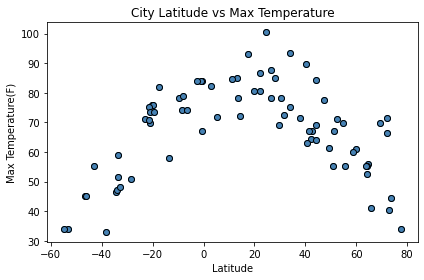

In [9]:
# Create a Scatter Plot for Latitude vs Temperature

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title("City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig1.png")

## Latitude vs. Humidity Plot

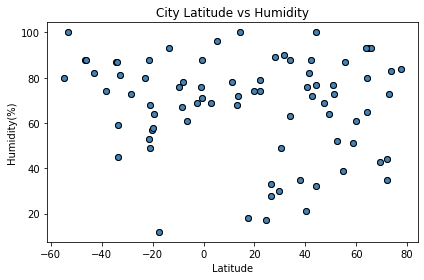

In [10]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs Humidity")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig2.png")

## Latitude vs. Cloudiness Plot

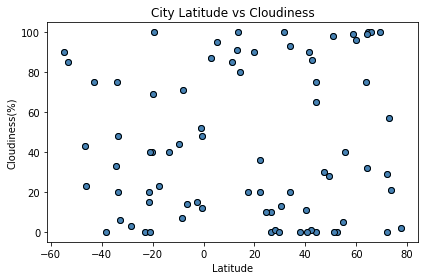

In [11]:
# Create a Scatter Plot for Latitude vs Humidity

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs Cloudiness")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig3.png")

## Latitude vs. Wind Speed Plot

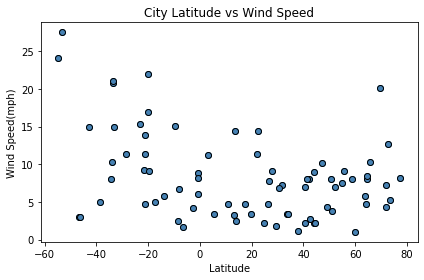

In [12]:
# Create a Scatter Plot for Latitude vs Wind Speed

x_values = clean_city_weather_df['Lat']
y_values = clean_city_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs Wind Speed")
plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black")

# Save and show the Scatter Plot
plt.tight_layout()
plt.show()
#plt.savefig("OutputData/Fig4.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression